In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv('stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [82]:
x=df.head()
x
df.shape

(1000, 8)

In [83]:
    df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [86]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [87]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [88]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [89]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())   
print(df['lunch'].unique()) 
print(df['test_preparation_course'].unique())   


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [90]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('we have {} categorical features : {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [91]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [92]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']  
df['average score']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [93]:
reading_full=df[df['reading_score']==100]['average score'].count()
writing_full=df[df['writing_score']==100]['average score'].count()
math_full=df[df['math_score']==100]['average score'].count()    
print(f'number of students with full reading score:{reading_full}')
print(f'number of students with full writing score:{writing_full}')   
print(f'number of students with full math score:{math_full}')

number of students with full reading score:17
number of students with full writing score:14
number of students with full math score:7


In [94]:
reading_less_20=df[df['reading_score']<=20]['average score'].count()
writing_less_20=df[df['writing_score']<=20]['average score'].count()
math_less_20=df[df['math_score']<=20]['average score'].count()
print(f'number of students with reading score less than or equal to 20:{reading_less_20}')
print(f'number of students with writing score less than or equal to 20:{writing_less_20}')
print(f'number of students with math score less than or equal to 20:{math_less_20}')

number of students with reading score less than or equal to 20:1
number of students with writing score less than or equal to 20:3
number of students with math score less than or equal to 20:4


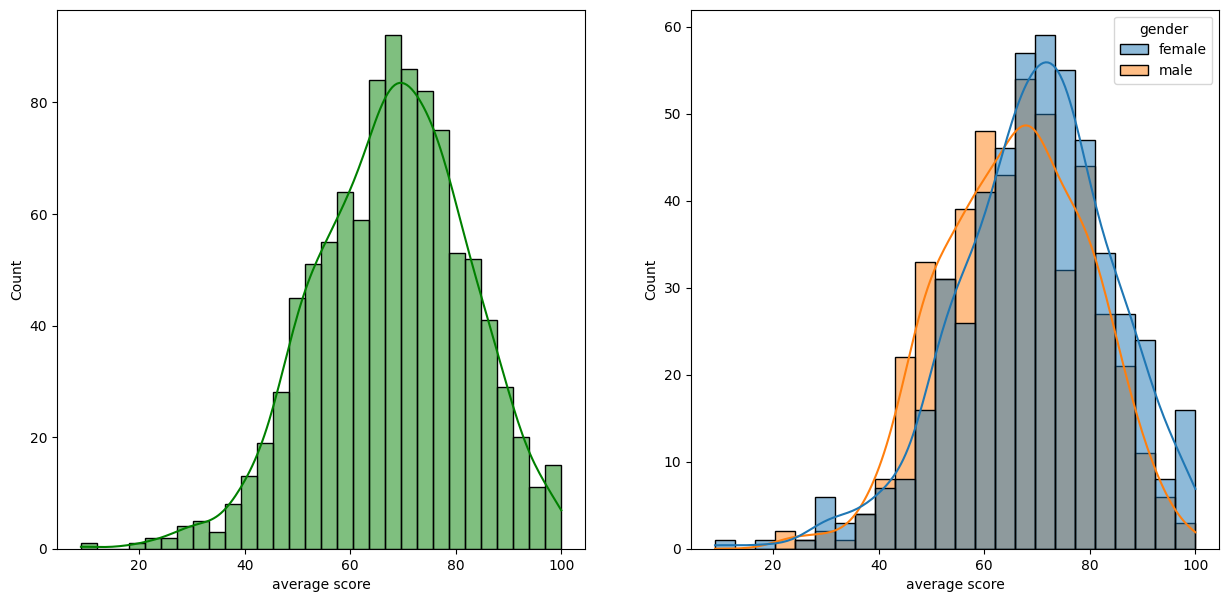

In [95]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

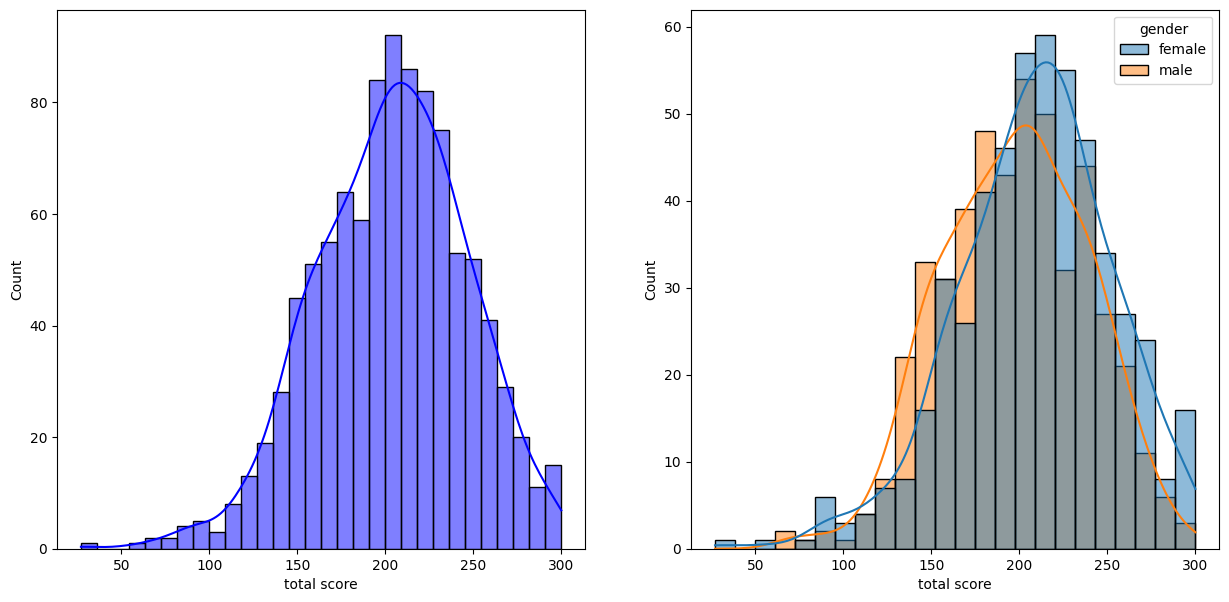

In [96]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

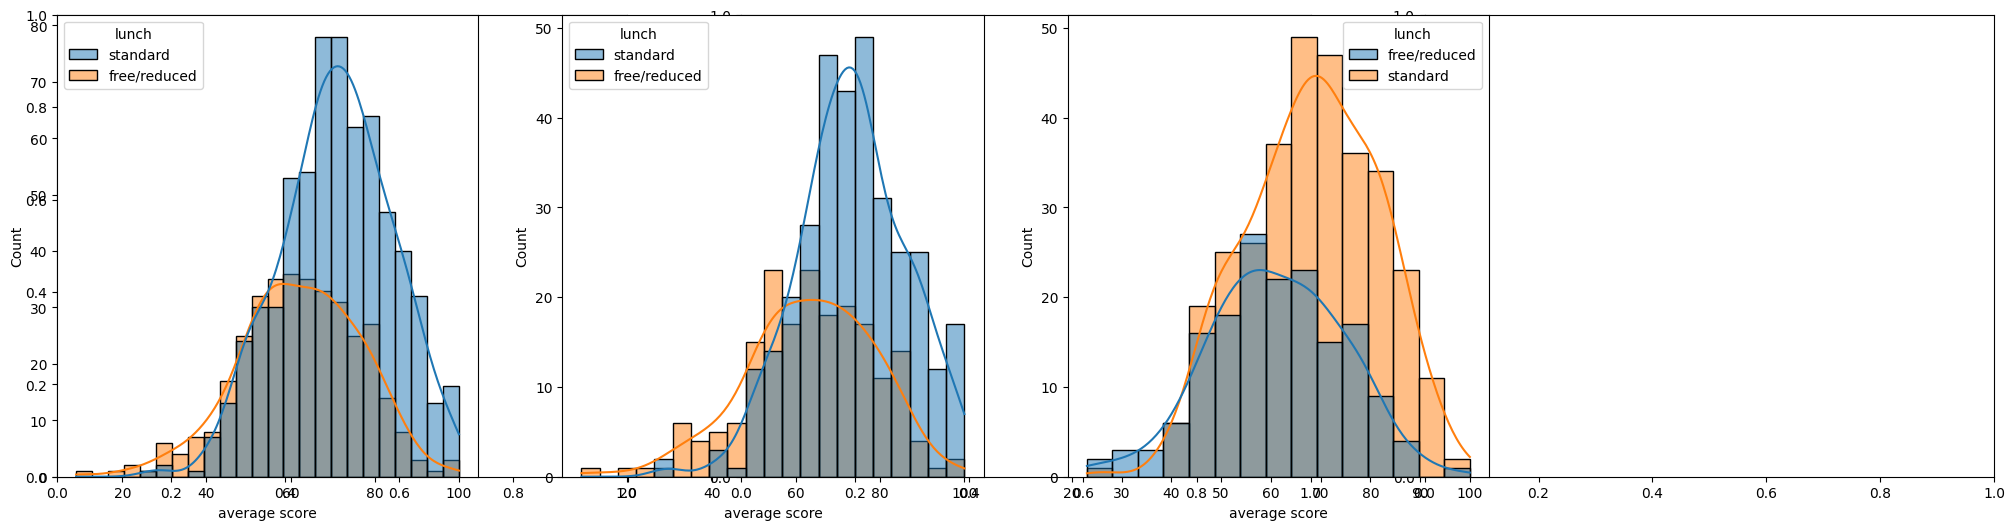

In [97]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()


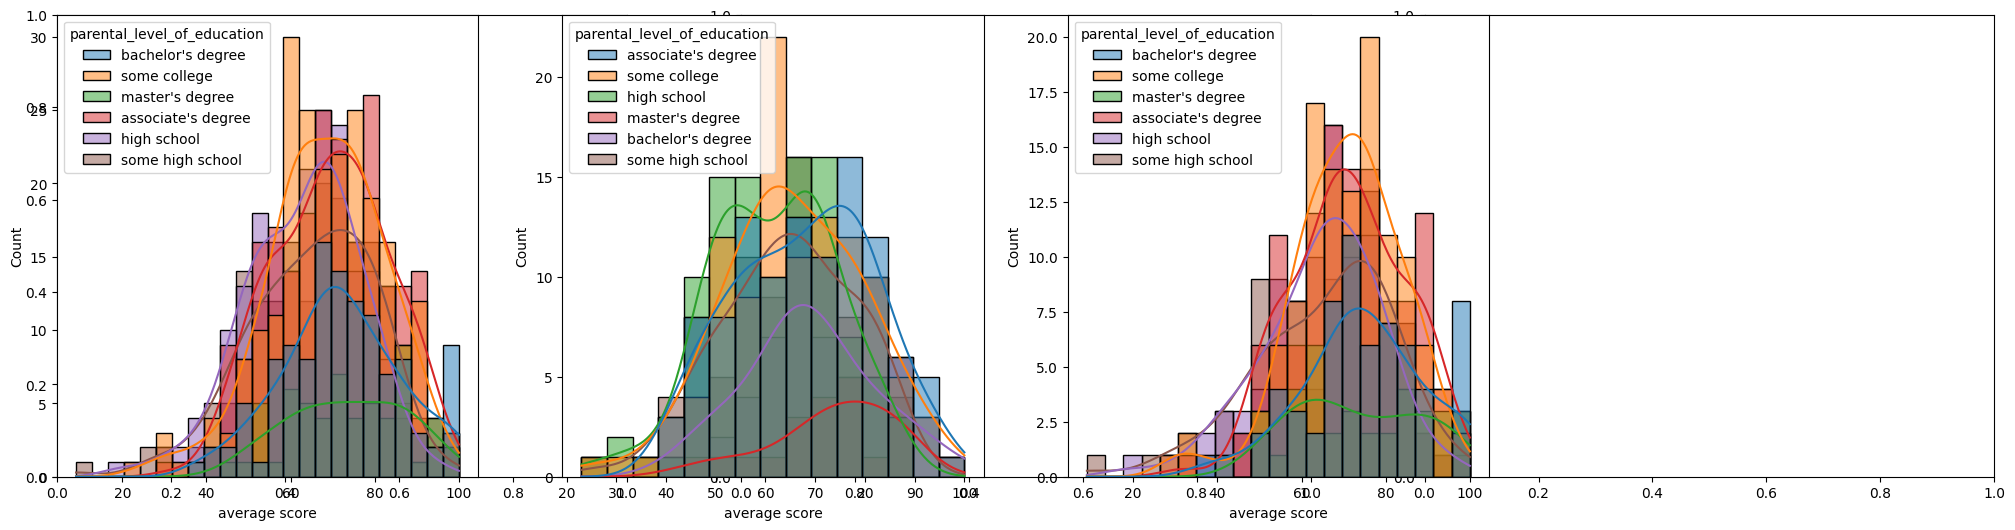

In [98]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental_level_of_education')
plt.show()     

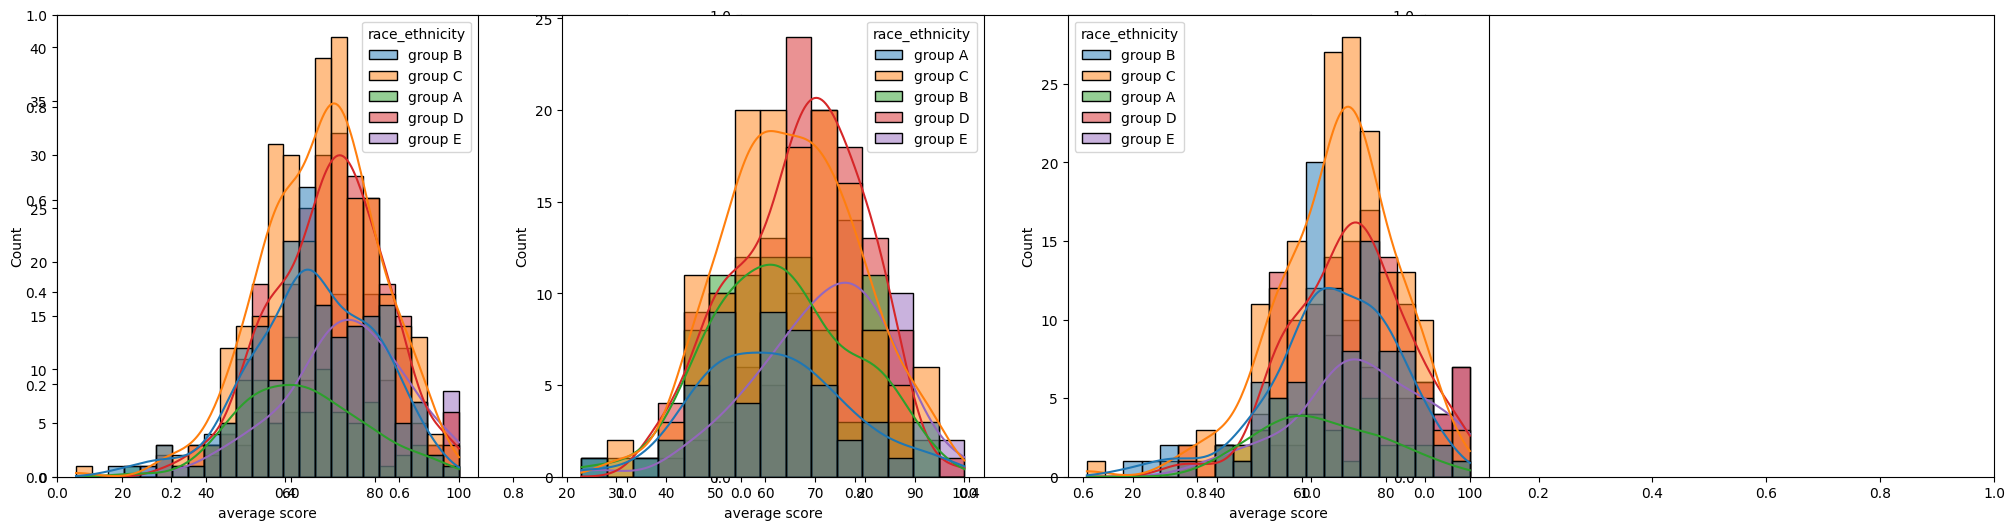

In [99]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race_ethnicity')
plt.show()

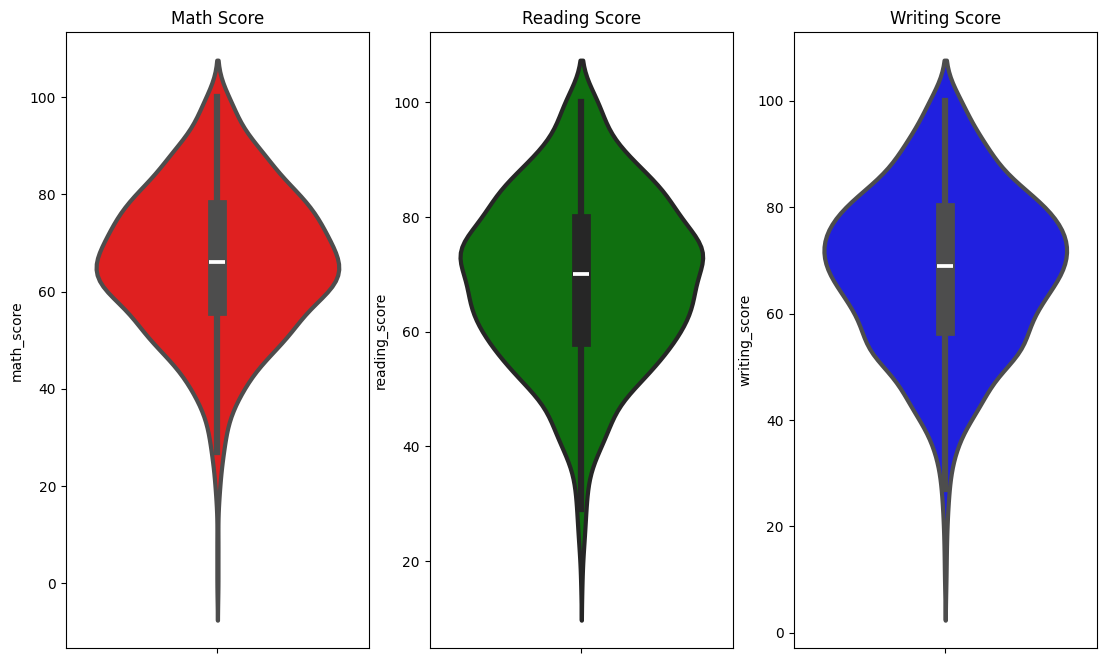

In [100]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

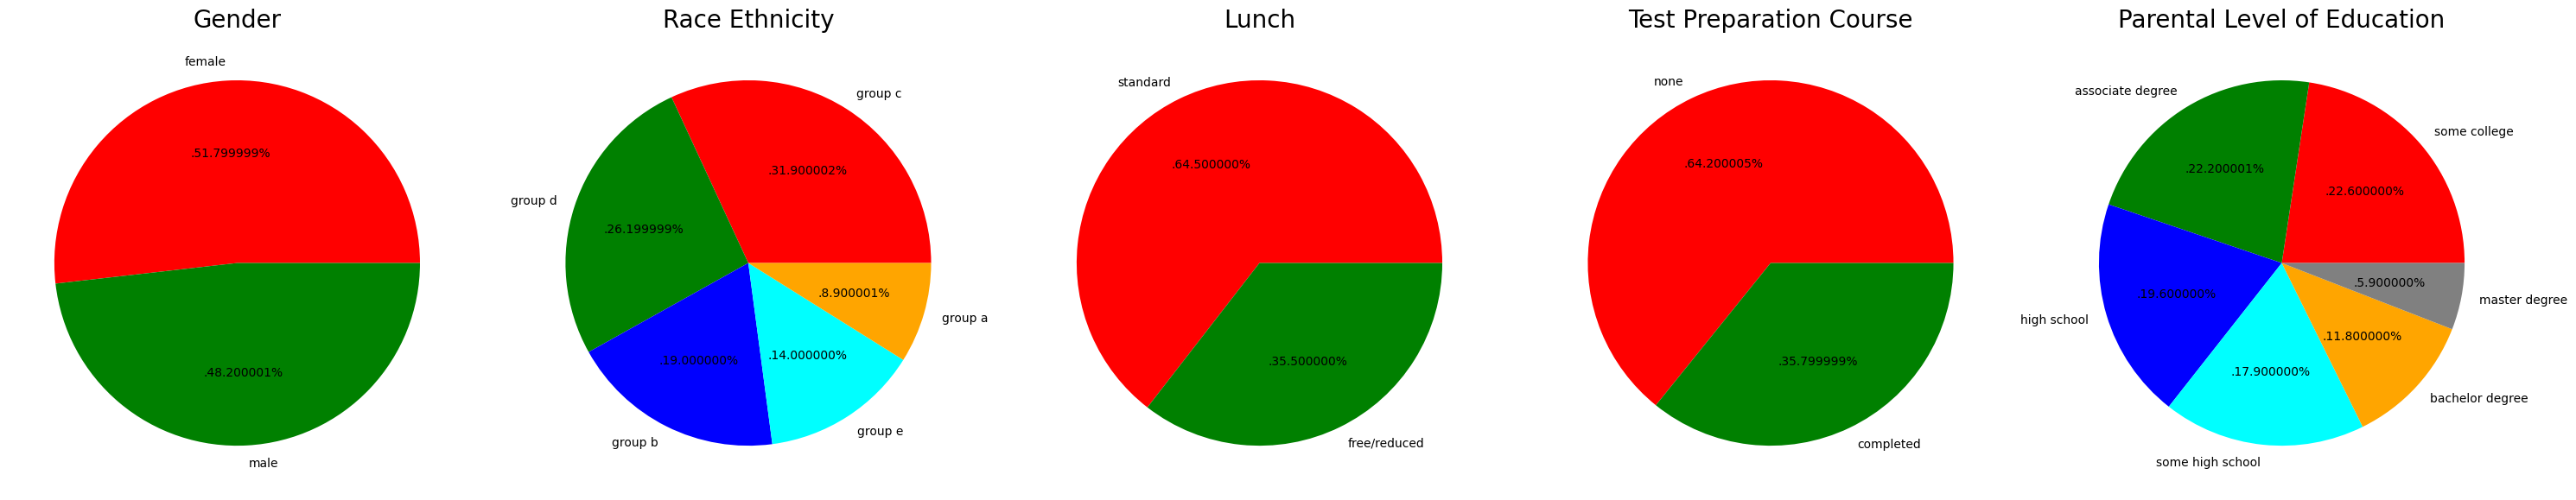

In [101]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='female','male'
color=['red','green']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group c','group d','group b','group e','group a'
color=['red','green','blue','cyan','orange']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Race Ethnicity',fontsize=20)
plt.axis('off')
plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='standard','free/reduced'
color=['red','green']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)  
plt.axis('off')
plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels='none','completed'
color=['red','green']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')
plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels=['some college','associate degree','high school','some high school','bachelor degree','master degree']
color=['red','green','blue','cyan','orange','grey']
plt.pie(size,labels=labels,colors=color,autopct='.%2f%%')
plt.title('Parental Level of Education',fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

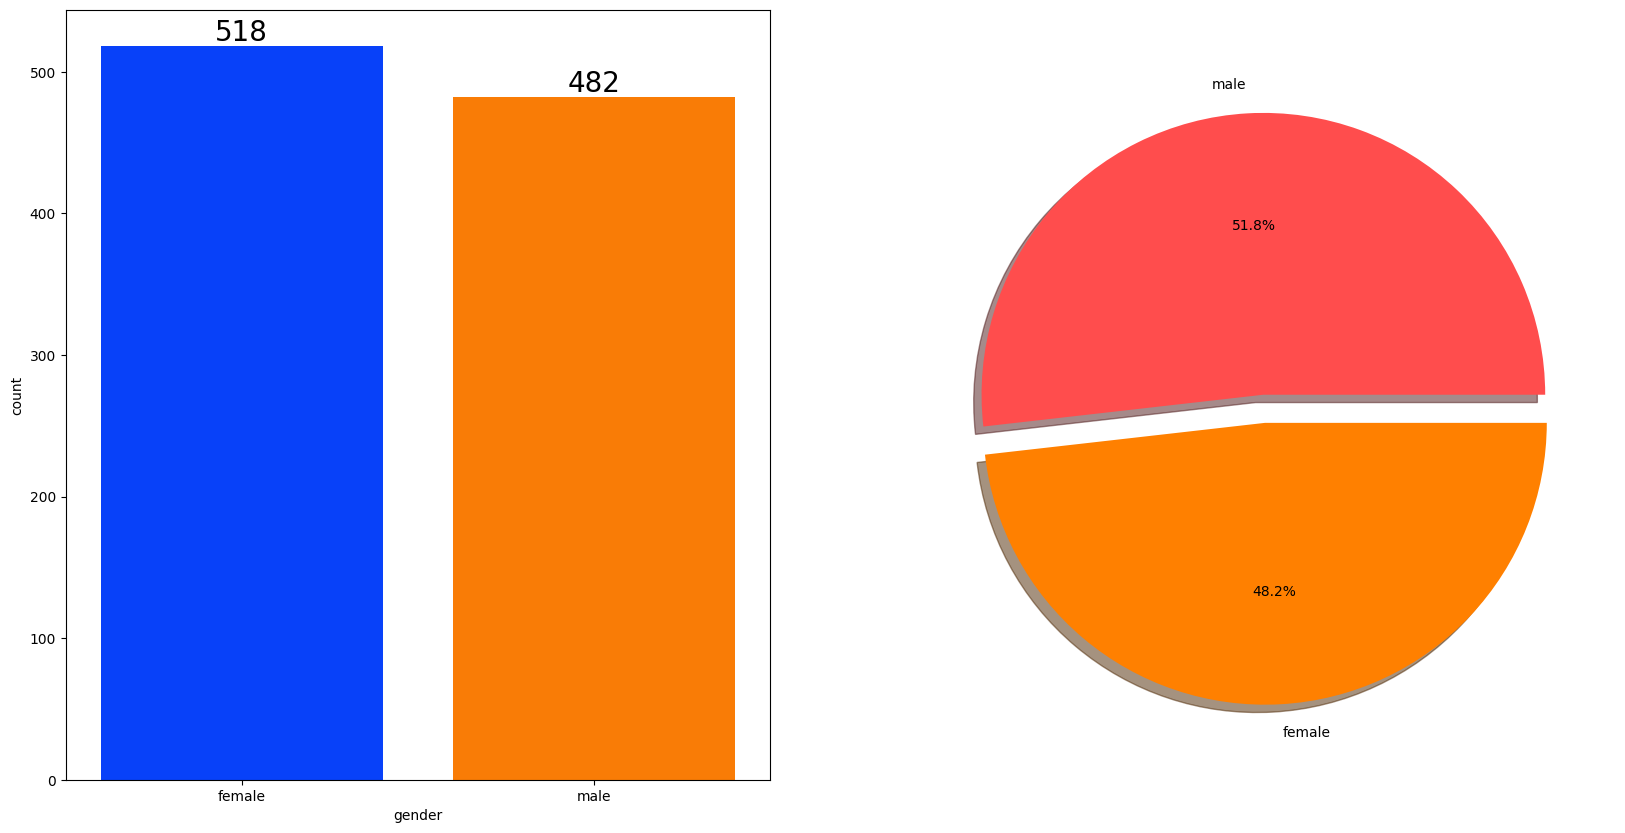

In [102]:
f,ax=plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(), labels=['male','female'],explode=[0,0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [104]:
gender_group=df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


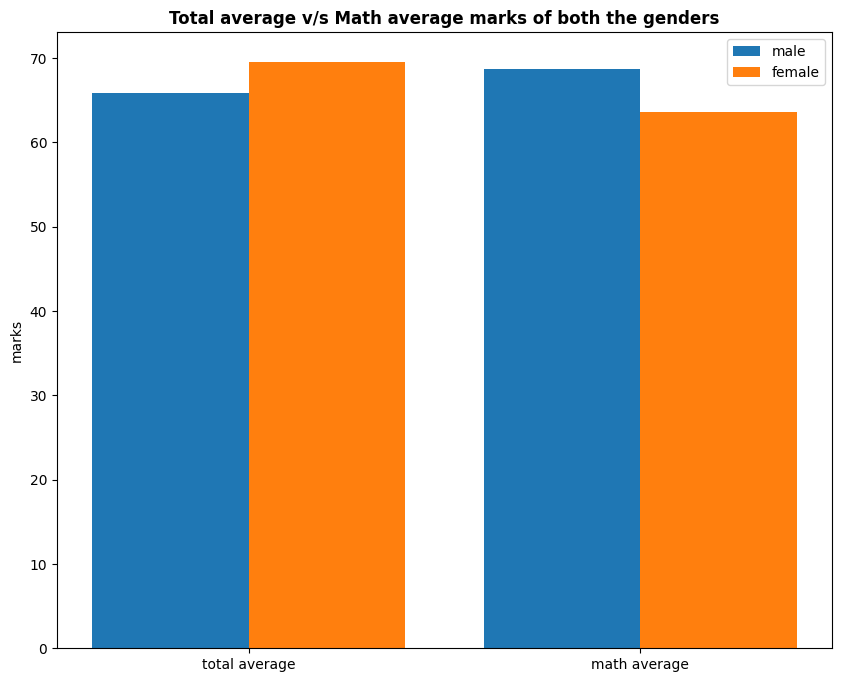

In [108]:
plt.figure(figsize=(10,8))
x=['total average','math average']
female_scores=[gender_group['average score'][0],gender_group['math_score'][0]]
male_scores =[gender_group['average score'][1],gender_group['math_score'][1]]
x_axis=np.arange(len(x))
plt.bar(x_axis-0.2,male_scores,0.4,label='male')
plt.bar(x_axis+0.2,female_scores,0.4,label='female')
plt.xticks(x_axis, x)
plt.ylabel("marks")
plt.title("Total average v/s Math average marks of both the genders",fontweight='bold')
plt.legend()
plt.show()


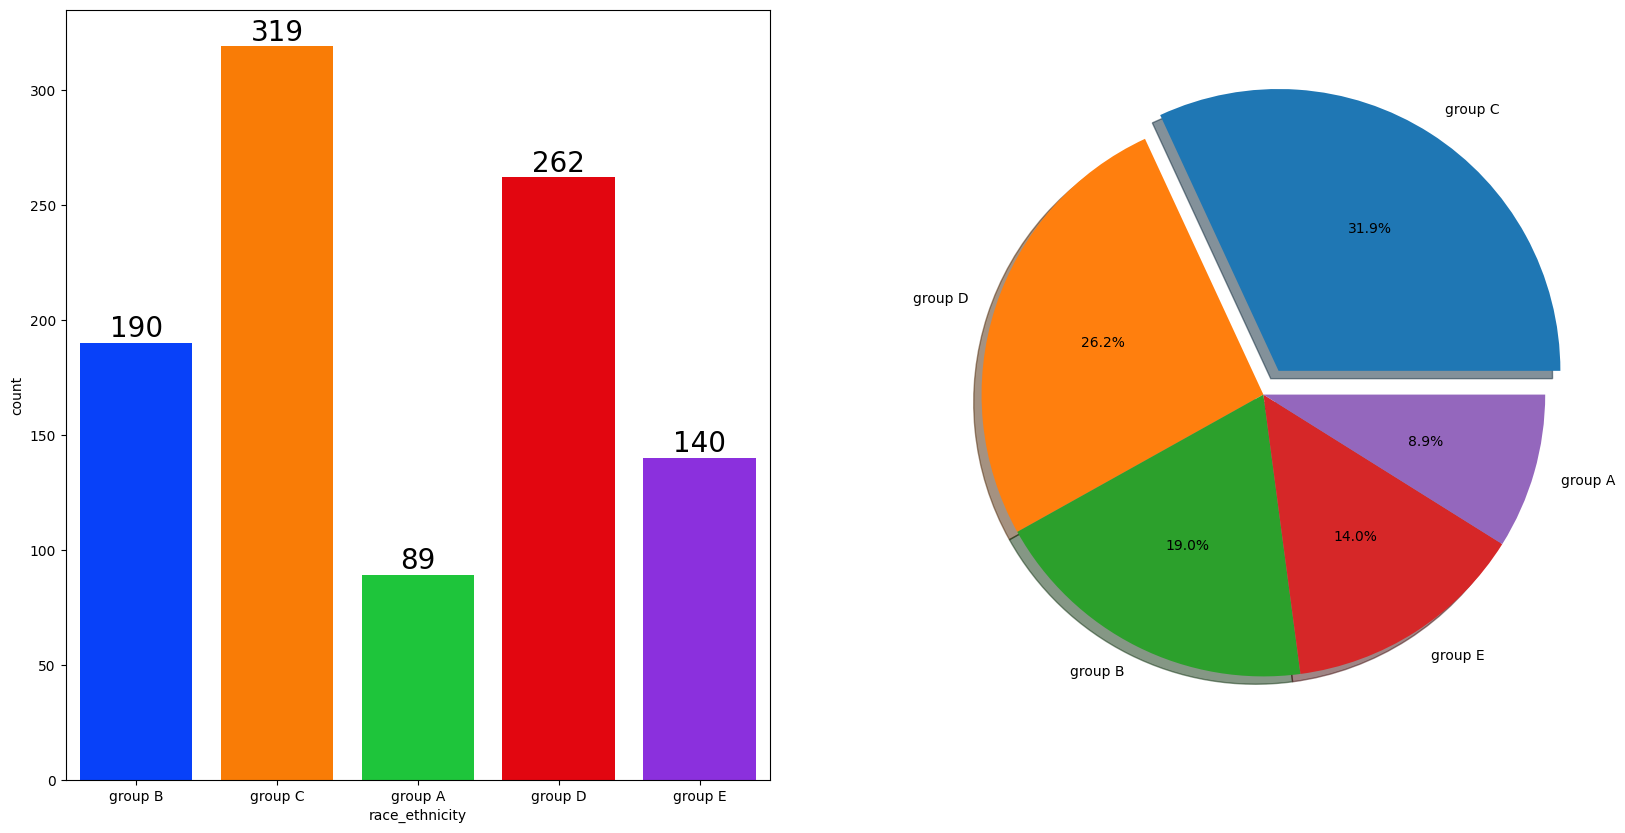

In [109]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

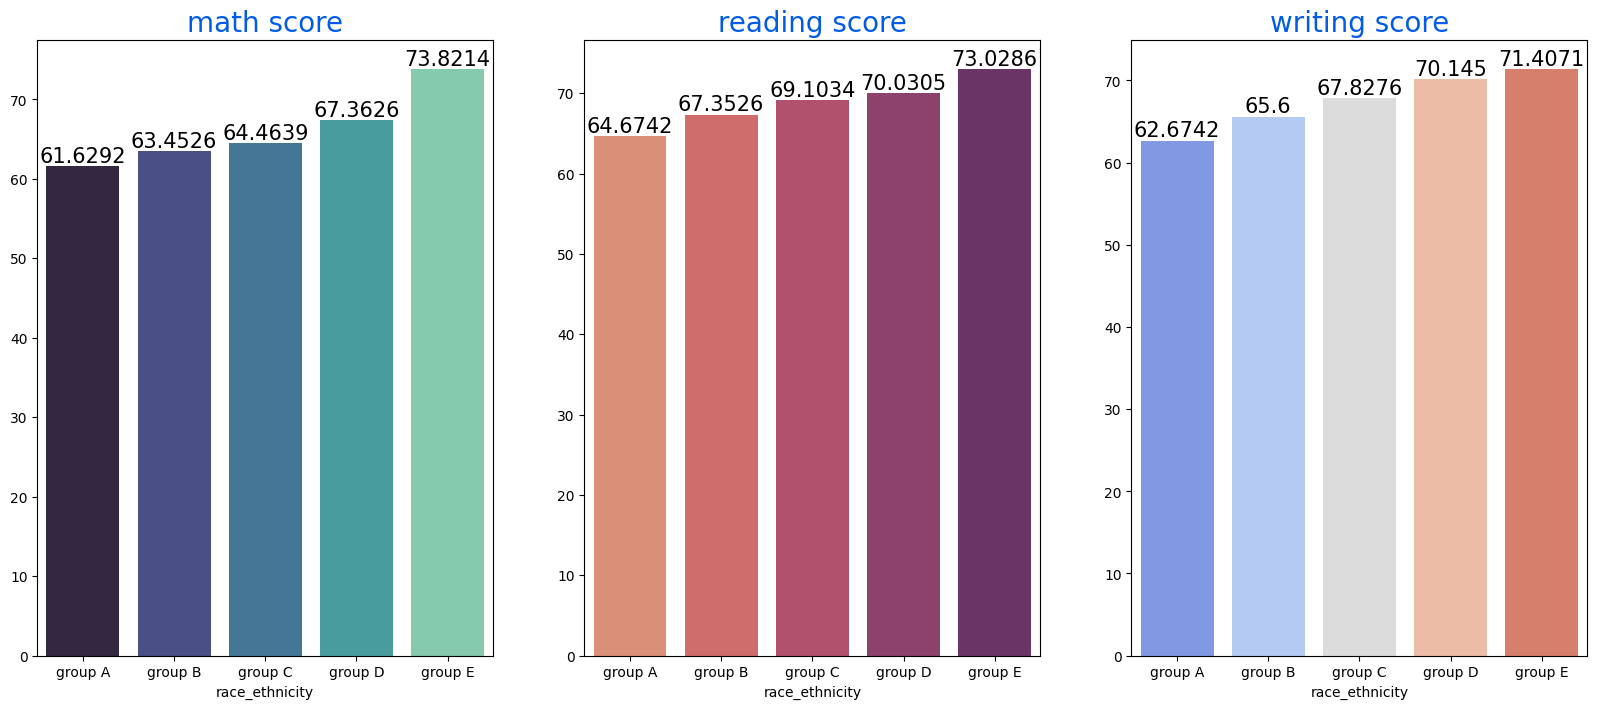

In [111]:
group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data2['math_score'].mean().index,y=group_data2['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
sns.barplot(x=group_data2['reading_score'].mean().index,y=group_data2['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
sns.barplot(x=group_data2['writing_score'].mean().index,y=group_data2['writing_score'].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title('writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

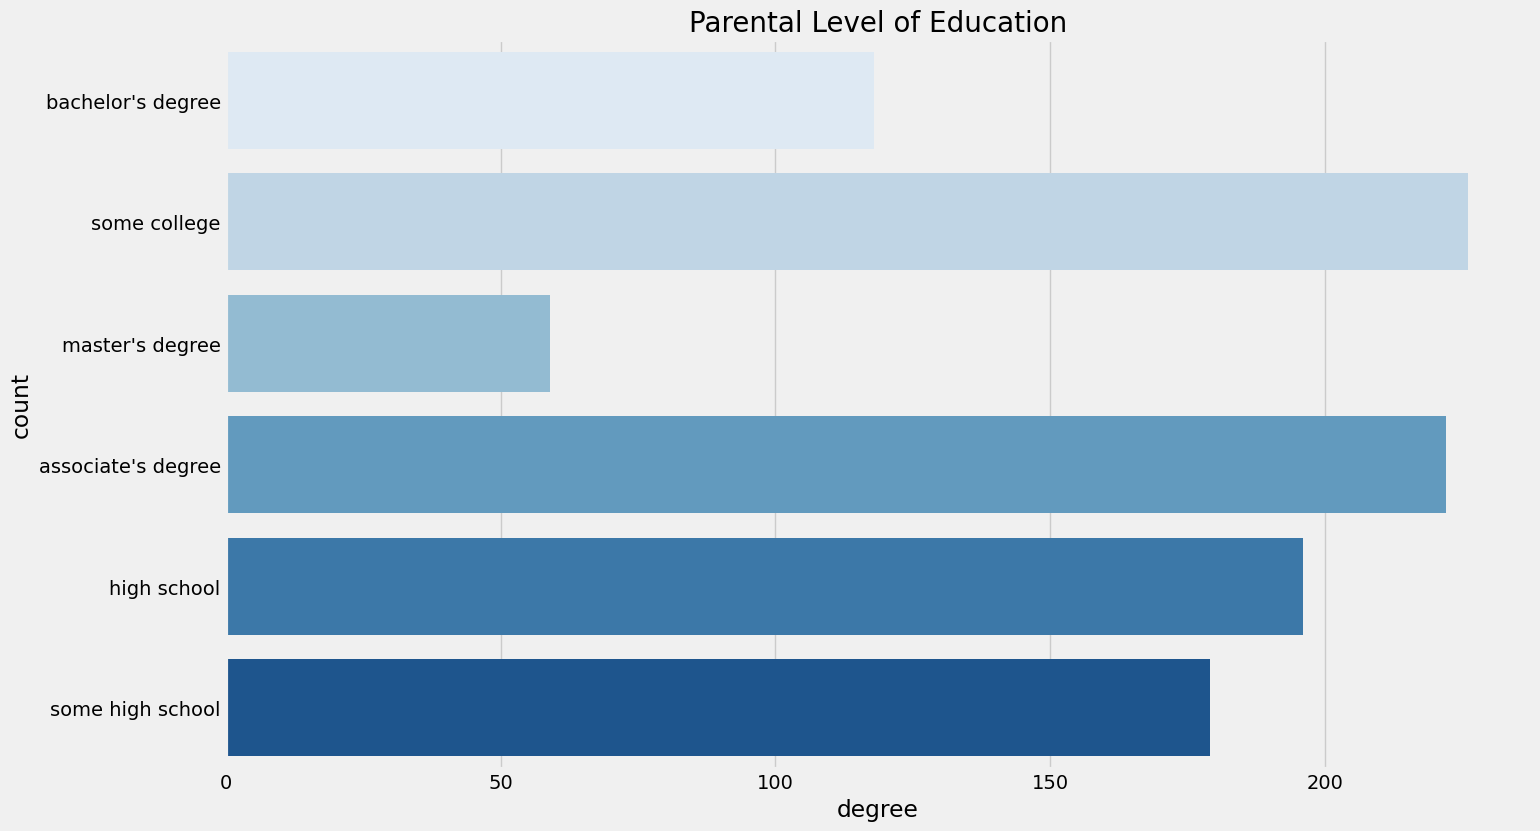

In [113]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Parental Level of Education', fontsize=20,fontweight=30)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

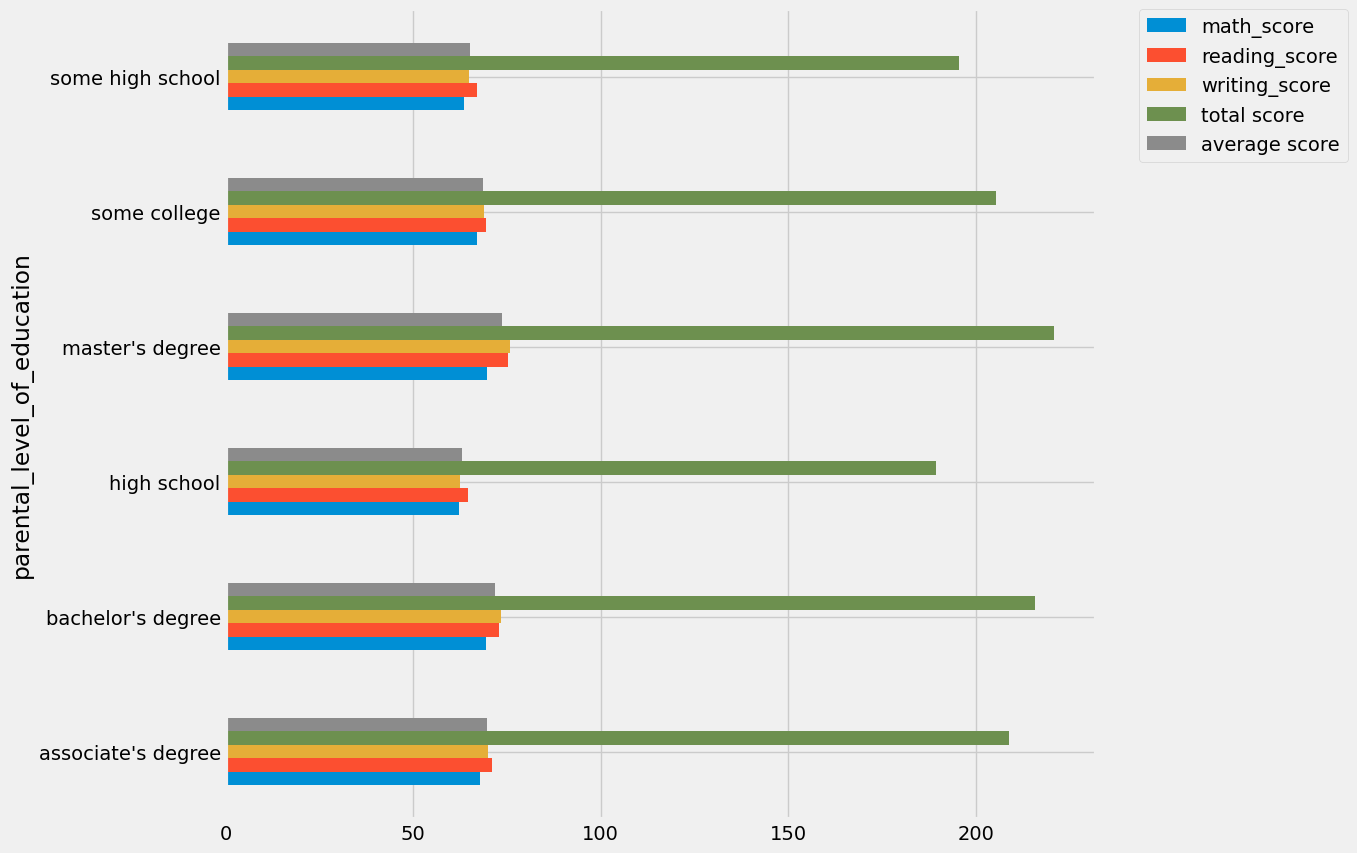

In [115]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

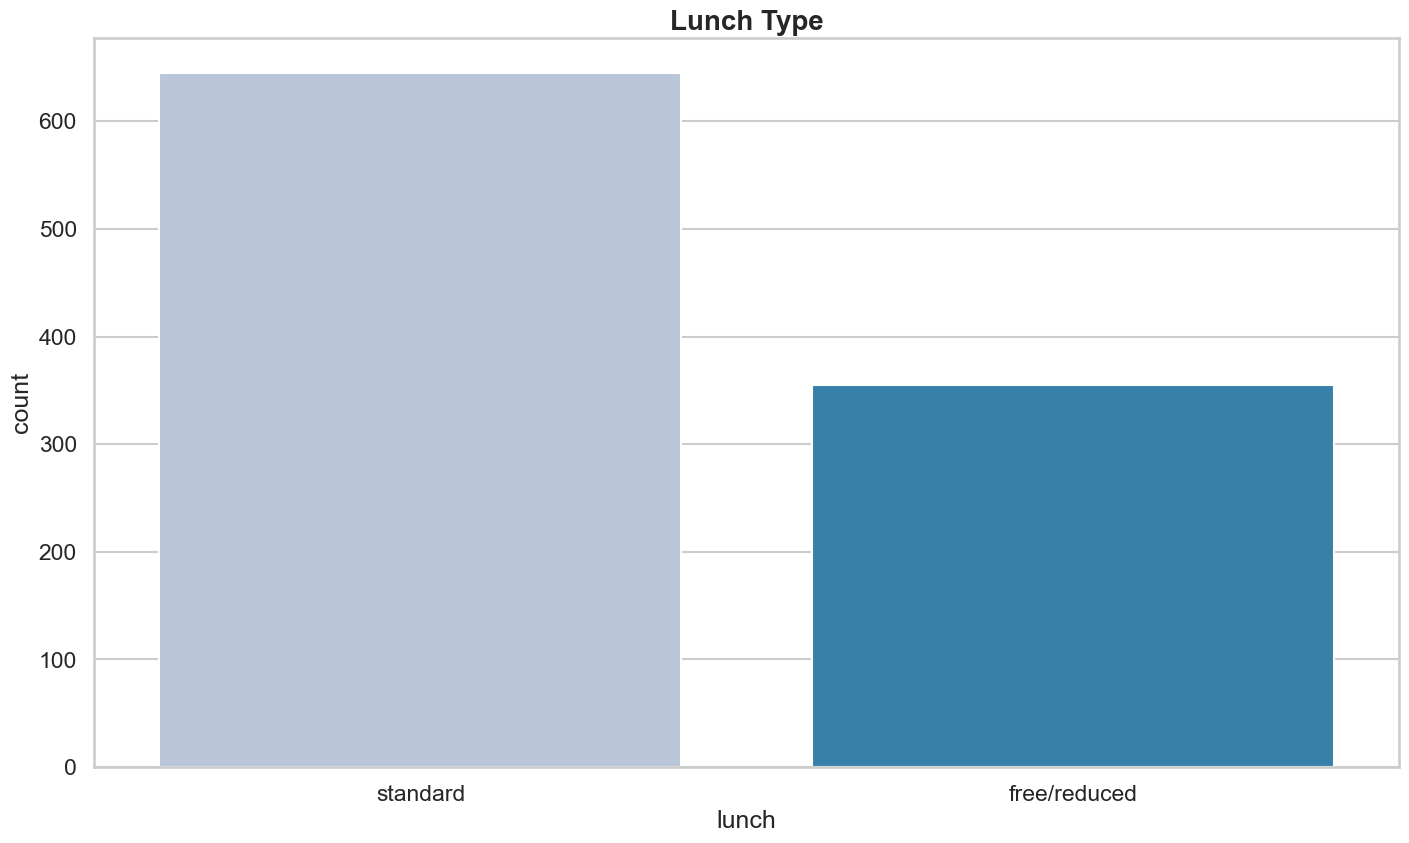

In [121]:
plt.rcParams['figure.figsize']=(15,9)
sns.set_theme(
    context="talk",      
    style="whitegrid"   
)

ax = sns.countplot(
    x='lunch',
    data=df,
    palette='PuBu'
)
plt.title('Lunch Type', fontsize=20,fontweight='bold')
plt.xlabel('lunch')
plt.ylabel('count')
plt.show()

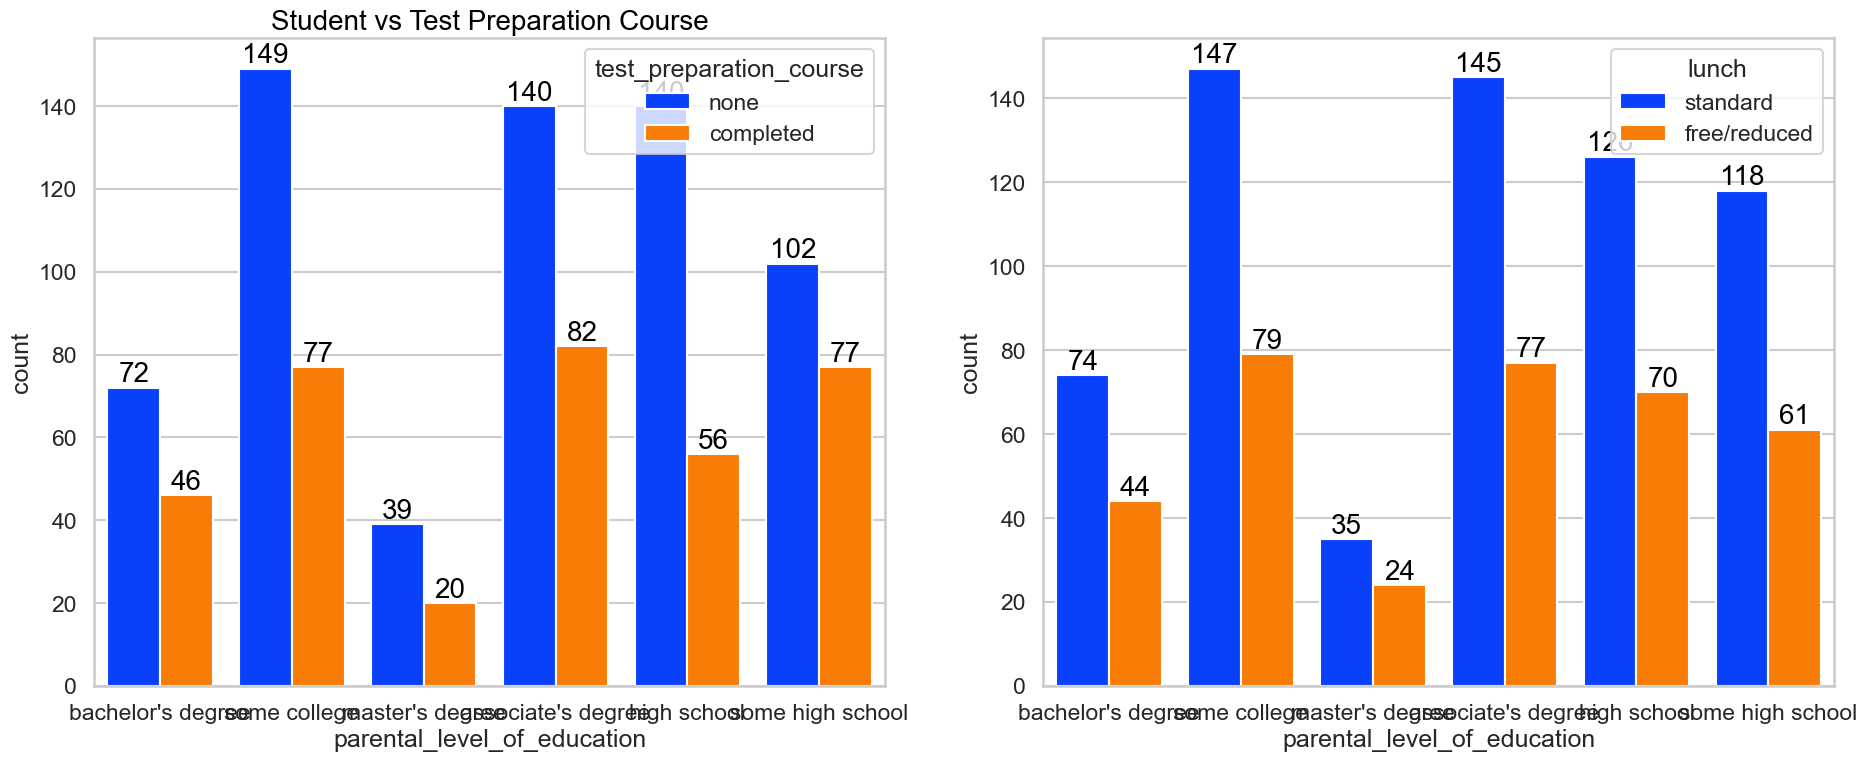

In [127]:
f,ax=plt.subplots(1,2, figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',ax=ax[0],saturation=0.95)
ax[0].set_title('Student vs Test Preparation Course',size=20,color='black')
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)



<Axes: xlabel='lunch', ylabel='writing_score'>

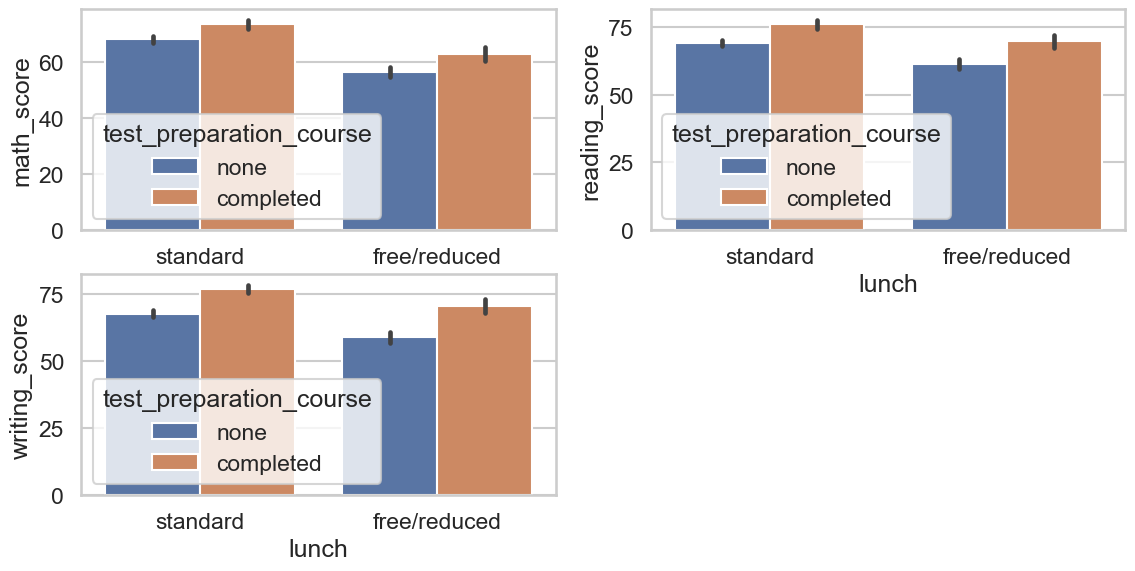

In [128]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,2,)
sns.barplot(x=df['lunch'],y=df['reading_score'],hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing_score'],hue=df['test_preparation_course'])



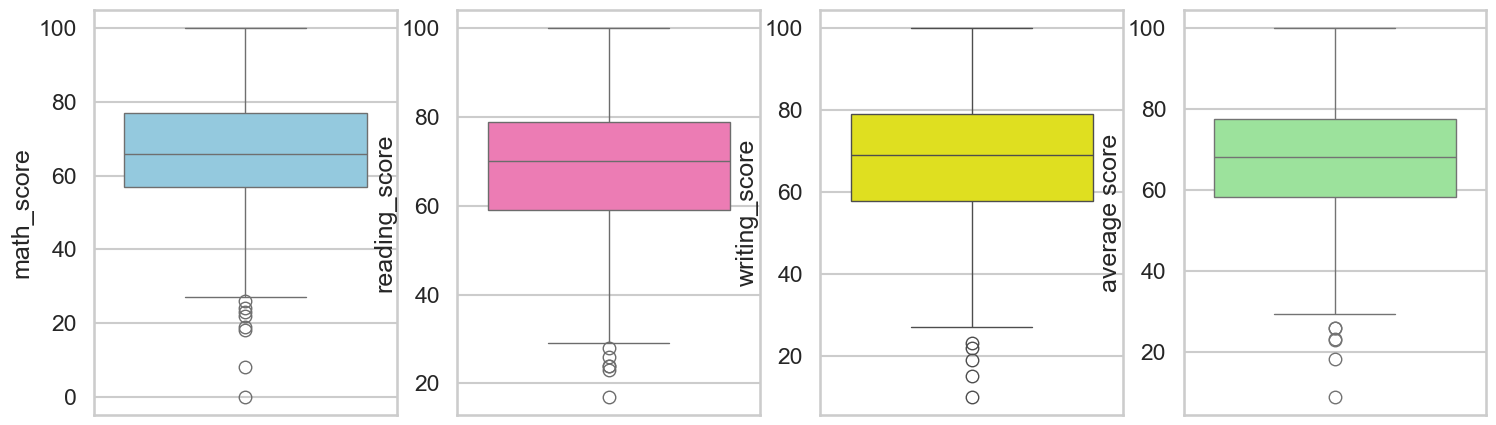

In [132]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

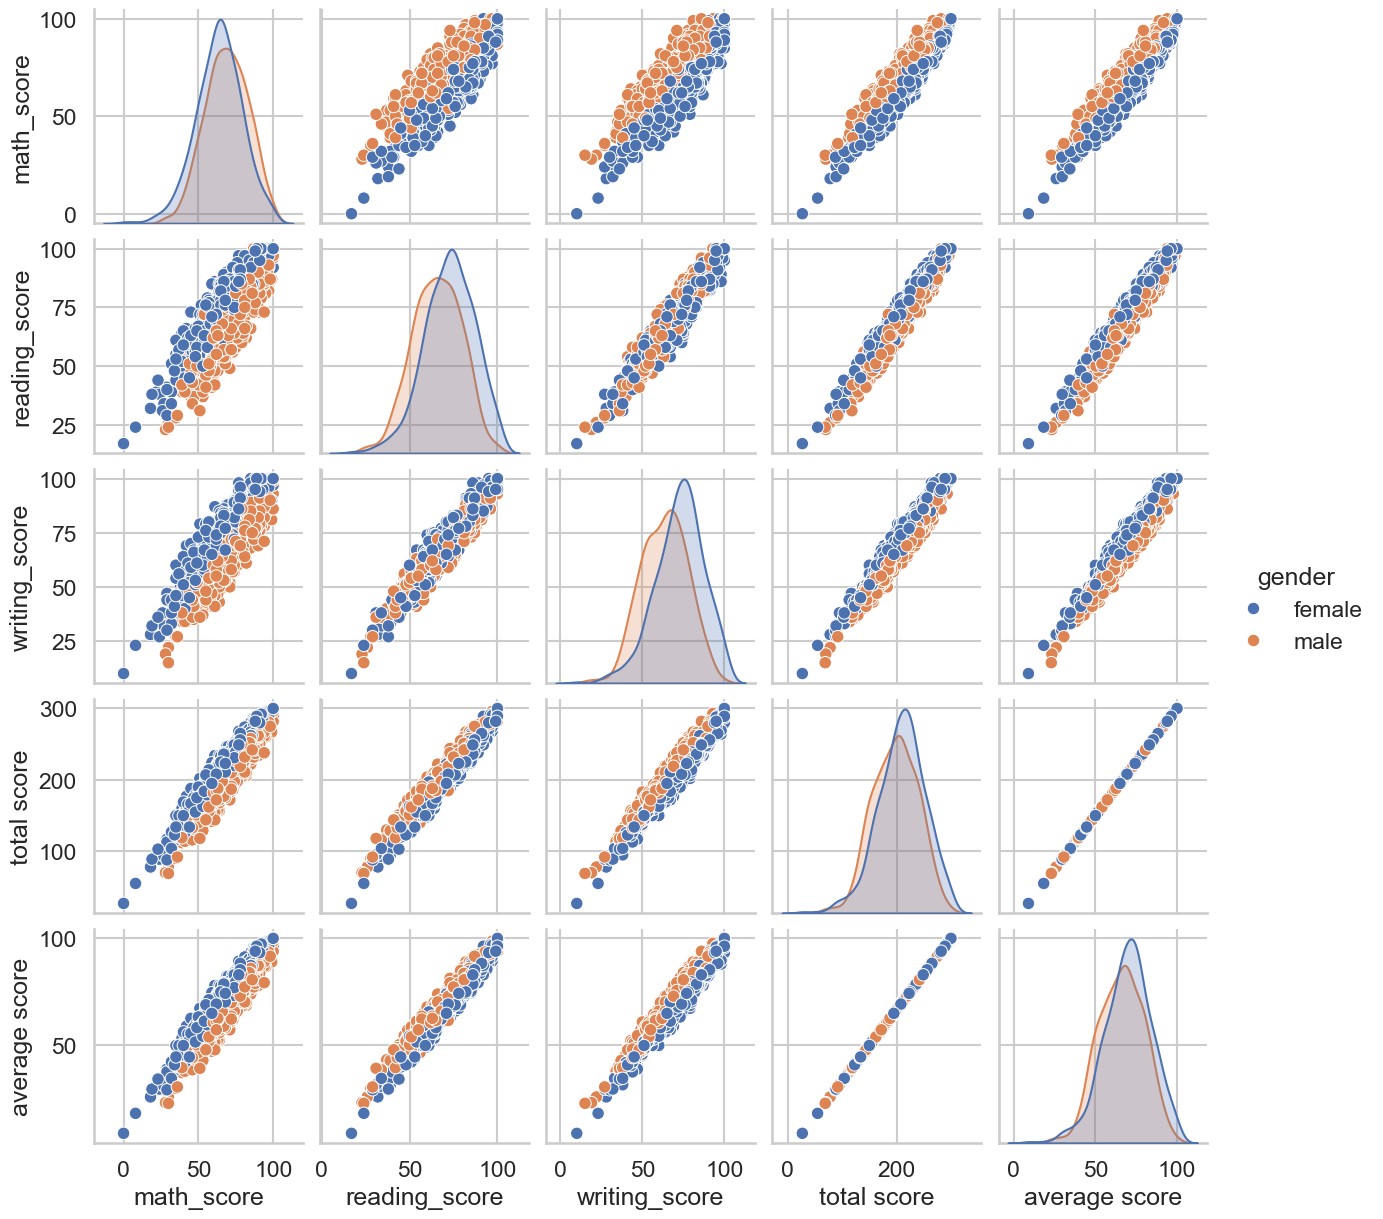

In [133]:
sns.pairplot(df,hue='gender')
plt.show()